## Step 1: Setup env, SQL connection and analyze SQL database table data

Import all necessary libraries and establish connection to the SQL database (score.db)

In [38]:
# Import necessary libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set path to SQL database
db_path = "../data/score.db"

# Create connection to SQL database
conn = sqlite3.connect(db_path)

# Set pandas options for better readability
pd.set_option('display.max_columns', None) # Display all columns in DataFrames
pd.set_option('display.max_rows', 100)     # Limit number of rows displayed

# Setup matplotlib and seaborn for inline visualization
%matplotlib inline
sns.set(style="whitegrid")

Explore structure of database by listing all available tables before any further actions

In [39]:
# Query to list all tables in the database
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql(query, conn)

# Display list of tables
tables

,name
0,score


Since there is only 'score' table in the database, the first few rows can be previewed to understand its structure

In [40]:
# Preview first few rows of 'score' table
query = "SELECT * FROM score LIMIT 10;"
df_score = pd.read_sql(query, conn)

# Display first 10 rows of the table
df_score.head()

,index,number_of_siblings,direct_admission,CCA,learning_style,student_id,gender,tuition,final_test,n_male,n_female,age,hours_per_week,attendance_rate,sleep_time,wake_time,mode_of_transport,bag_color
0,0,0,Yes,Sports,Visual,ACN2BE,Female,No,69.0,14.0,2.0,16.0,10.0,91.0,22:00,6:00,private transport,yellow
1,1,2,No,Sports,Auditory,FGXIIZ,Female,No,47.0,4.0,19.0,16.0,7.0,94.0,22:30,6:30,private transport,green
2,2,0,Yes,None,Visual,B9AI9F,Male,No,85.0,14.0,2.0,15.0,8.0,92.0,22:30,6:30,private transport,white
3,3,1,No,Clubs,Auditory,FEVM1T,Female,Yes,64.0,2.0,20.0,15.0,18.0,NaN,21:00,5:00,public transport,yellow
4,4,0,No,Sports,Auditory,AXZN2E,Male,No,66.0,24.0,3.0,16.0,7.0,95.0,21:30,5:30,public transport,yellow


The structure of 'score' table is the same as the information provided in the PDF <br>
There are multiple columns of data available in 'score' table but not all are relevant or related to predicting the students' scores

The schema of the selected table is retrieved to understand the columns and their data types

In [41]:
# Get schema of 'score' table
query = "PRAGMA table_info(score);"
schema = pd.read_sql(query, conn)

# Display schema information
schema

,cid,name,type,notnull,dflt_value,pk
0,0,index,INTEGER,0,None,0
1,1,number_of_siblings,INTEGER,0,None,0
2,2,direct_admission,TEXT,0,None,0
3,3,CCA,TEXT,0,None,0
4,4,learning_style,TEXT,0,None,0
5,5,student_id,TEXT,0,None,0
6,6,gender,TEXT,0,None,0
7,7,tuition,TEXT,0,None,0
8,8,final_test,REAL,0,None,0
9,9,n_male,REAL,0,None,0


Using the schema, the type of data can be easily understood <br>
Since there are some columns with data that are of non-numeric type, feature engineering will have to be done to convert them to numeric form <br>
Labelling will be done for all text type columns that are determined to possibly related to the students' score (final_test)

## Step 2: Perform Exploratory Data Analysis (EDA) on 'score' table

Firstly, check the number of rows in 'score' table to get a sense of the size of the data

In [42]:
# Get row_count of 'score' table
row_count_query = "SELECT COUNT(*) AS count FROM score;"
row_count = pd.read_sql_query(row_count_query, conn)

# Display number of rows in 'score' table
row_count

,count
0,15900


With a data size of 15900 rows, the data set can be taken to be big <br>
This will affect the possible models to be considered in the next task

Next, load all the data into a DataFrame for actual data analysis

In [43]:
# Get all data from 'score' table
score_data_query = "SELECT * FROM score;"
score_data_df = pd.read_sql_query(score_data_query, conn)

Before eliminating seemingly irrelevant columns, use student_id to eliminate duplicate data first as it should be unique

In [44]:
score_data_df = score_data_df.drop_duplicates(subset="student_id", keep="first")
score_data_df

,index,number_of_siblings,direct_admission,CCA,learning_style,student_id,gender,tuition,final_test,n_male,n_female,age,hours_per_week,attendance_rate,sleep_time,wake_time,mode_of_transport,bag_color
0,0,0,Yes,Sports,Visual,ACN2BE,Female,No,69.0,14.0,2.0,16.0,10.0,91.0,22:00,6:00,private transport,yellow
1,1,2,No,Sports,Auditory,FGXIIZ,Female,No,47.0,4.0,19.0,16.0,7.0,94.0,22:30,6:30,private transport,green
2,2,0,Yes,None,Visual,B9AI9F,Male,No,85.0,14.0,2.0,15.0,8.0,92.0,22:30,6:30,private transport,white
3,3,1,No,Clubs,Auditory,FEVM1T,Female,Yes,64.0,2.0,20.0,15.0,18.0,NaN,21:00,5:00,public transport,yellow
4,4,0,No,Sports,Auditory,AXZN2E,Male,No,66.0,24.0,3.0,16.0,7.0,95.0,21:30,5:30,public transport,yellow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15895,15895,1,No,Clubs,Visual,XPECN2,Female,No,56.0,12.0,14.0,16.0,9.0,96.0,22:00,6:00,private transport,black
15896,15896,1,Yes,None,Auditory,7AMC7S,Male,Yes,85.0,17.0,5.0,16.0,7.0,91.0,22:30,6:30,private transport,white
15897,15897,1,Yes,Sports,Auditory,XKZ6VN,Female,Yes,76.0,7.0,10.0,15.0,7.0,93.0,23:00,7:00,walk,red
15898,15898,1,No,Clubs,Visual,2OU4UQ,Male,Yes,45.0,18.0,12.0,16.0,3.0,94.0,23:00,7:00,walk,yellow


There are some columns in 'score' table that are irrelevant in predicting the students' results <br>
These columns will be dropped from the DataFrame:
- index
- number_of_siblings
- student_id
- gender
- n_male
- n_female
- age
- bag_color

(Removed - Don't drop features so quickly -- Only drop index, student_id)

In [ ]:
#irrelevant_col_list = ["index", "number_of_siblings", "student_id", "gender", "n_male", "n_female", "age", "bag_color"]
irrelevant_col_list = ["index", "student_id"]

drop_col_score_data_df = score_data_df.drop(columns = irrelevant_col_list)

Then clean-up the data of missing cell info <br>
Example: If a cell in a row has missing value, then the row should be dropped <br>
Firstly, the columns that have empty cells are printed, along with the number rows that are affected

In [46]:
# Check the number of rows that have missing data
missing_data = drop_col_score_data_df.isnull().sum()

# Display number of affected rows
print("Missing values in each column: ")
print(missing_data[missing_data > 0])

Missing values in each column: 
final_test         463
attendance_rate    734
dtype: int64


In [47]:
# Drop rows if there are any missing values
cleaned_score_data_df = drop_col_score_data_df.dropna()

# Verify if all missing values are dropped
print("Missing values after dropping rows: ")
print(cleaned_score_data_df.isnull().sum())

Missing values after dropping rows: 
number_of_siblings    0
direct_admission      0
CCA                   0
learning_style        0
gender                0
tuition               0
final_test            0
n_male                0
n_female              0
age                   0
hours_per_week        0
attendance_rate       0
sleep_time            0
wake_time             0
mode_of_transport     0
bag_color             0
dtype: int64


Since sleep_time & wake_time columns are the only ones that are of non int/float values, they will need to be converted to numeric value <br>
These two columns will be used to calculate the number of hours of sleep each student has to try and get a correlation result

In [54]:
# Create function to calculate sleep hours
def cal_sleep_hours(sleep_time, wake_time):
    # Convert sleep_time and wake_time to datetime objects
    sleep_time = datetime.strptime(sleep_time, '%H:%M')
    wake_time = datetime.strptime(wake_time, "%H:%M")

    # If wake_time is earlier than sleep_time, assume wake_time is on the next day
    if wake_time < sleep_time:
        wake_time += pd.Timedelta(days = 1)

    # Calculate difference in hours
    sleep_duration = (wake_time - sleep_time).total_seconds() / 3600 # Convert seconds to hours
 
    return sleep_duration

# Apply function to calculate sleep hours for each row
cleaned_score_data_df["sleep_hours"] = cleaned_score_data_df.apply(lambda row: cal_sleep_hours(row["sleep_time"], row["wake_time"]), axis = 1)

# Drop sleep_time and wake_time columns since they cannot be correlated
time_col_list = ["sleep_time", "wake_time"]
cleaned_score_data_df = cleaned_score_data_df.drop(columns = time_col_list)

# Check updated DataFrame
cleaned_score_data_df

C:\Users\waele\AppData\Local\Temp\ipykernel_24432\2190864597.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_score_data_df["sleep_hours"] = cleaned_score_data_df.apply(lambda row: cal_sleep_hours(row["sleep_time"], row["wake_time"]), axis = 1)


,number_of_siblings,direct_admission,CCA,learning_style,gender,tuition,final_test,n_male,n_female,age,hours_per_week,attendance_rate,mode_of_transport,bag_color,sleep_hours
0,0,Yes,Sports,Visual,Female,No,69.0,14.0,2.0,16.0,10.0,91.0,private transport,yellow,8.0
1,2,No,Sports,Auditory,Female,No,47.0,4.0,19.0,16.0,7.0,94.0,private transport,green,8.0
2,0,Yes,None,Visual,Male,No,85.0,14.0,2.0,15.0,8.0,92.0,private transport,white,8.0
4,0,No,Sports,Auditory,Male,No,66.0,24.0,3.0,16.0,7.0,95.0,public transport,yellow,8.0
5,0,No,Arts,Visual,Female,No,57.0,9.0,12.0,15.0,11.0,96.0,private transport,red,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15895,1,No,Clubs,Visual,Female,No,56.0,12.0,14.0,16.0,9.0,96.0,private transport,black,8.0
15896,1,Yes,None,Auditory,Male,Yes,85.0,17.0,5.0,16.0,7.0,91.0,private transport,white,8.0
15897,1,Yes,Sports,Auditory,Female,Yes,76.0,7.0,10.0,15.0,7.0,93.0,walk,red,8.0
15898,1,No,Clubs,Visual,Male,Yes,45.0,18.0,12.0,16.0,3.0,94.0,walk,yellow,8.0


It can now be used to generate summary statistics to check on the mean, median, 25%, etc

In [55]:
# Get summary statistics from 'score' DataFrame
summary_stats = cleaned_score_data_df.describe()

# Display summary statistics
summary_stats

,number_of_siblings,final_test,n_male,n_female,age,hours_per_week,attendance_rate,sleep_hours
count,13824.000000,13824.000000,13824.000000,13824.000000,13824.000000,13824.000000,13824.000000,13824.000000
mean,0.888672,67.156467,13.841942,8.951968,15.204861,10.330006,93.280527,7.846644
std,0.751841,13.969046,6.548047,6.682039,1.785378,4.465503,7.948853,0.601722
min,0.000000,32.000000,0.000000,0.000000,-5.000000,0.000000,40.000000,4.000000
25%,0.000000,56.000000,10.000000,4.000000,15.000000,7.000000,92.000000,8.000000
50%,1.000000,68.000000,14.000000,8.000000,15.000000,9.000000,95.000000,8.000000
75%,1.000000,78.000000,18.000000,13.000000,16.000000,14.000000,97.000000,8.000000
max,2.000000,100.000000,31.000000,31.000000,16.000000,20.000000,100.000000,8.000000


Based on the summary statistics, the bottom 25% score is 56 which can be taken to be the benchmark for this prediction <br>
However, this is just a metric determined based on the statistics

Perform one-hot encoding and standardization

In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Standardize data-set 
cleaned_score_data_df[["age", "final_test", "n_male", "n_female", "hours_per_week", "attendance_rate", "sleep_hours", "number_of_siblings"]] = scaler.fit_transform(cleaned_score_data_df[["age", "final_test", "n_male", "n_female", "hours_per_week", "attendance_rate", "sleep_hours", "number_of_siblings"]])

# Perform one-hot encoding on categorical variables
encoded_score_data_df = pd.get_dummies(cleaned_score_data_df, columns = ["direct_admission", "CCA", "gender", "learning_style", "tuition", "mode_of_transport", "bag_color"], drop_first = True)
bool_col = encoded_score_data_df.select_dtypes(include=["bool"]).columns
encoded_score_data_df[bool_col] = encoded_score_data_df[bool_col].astype(int)
encoded_score_data_df

,number_of_siblings,final_test,n_male,n_female,age,hours_per_week,attendance_rate,sleep_hours,direct_admission_Yes,CCA_Arts,CCA_CLUBS,CCA_Clubs,CCA_NONE,CCA_None,CCA_SPORTS,CCA_Sports,gender_Male,learning_style_Visual,tuition_No,tuition_Y,tuition_Yes,mode_of_transport_public transport,mode_of_transport_walk,bag_color_blue,bag_color_green,bag_color_red,bag_color_white,bag_color_yellow
0,-1.182036,0.131977,0.024139,-1.040434,0.445378,-0.073904,-0.286910,0.254872,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1
1,1.478195,-1.442990,-1.503089,1.503792,0.445378,-0.745745,0.090516,0.254872,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0
2,-1.182036,1.277409,0.024139,-1.040434,-0.114748,-0.521798,-0.161102,0.254872,1,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,1,0
4,-1.182036,-0.082791,1.551367,-0.890773,0.445378,-0.745745,0.216325,0.254872,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1
5,-1.182036,-0.727096,-0.739475,0.456170,-0.114748,0.150043,0.342134,0.254872,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15895,0.148079,-0.798685,-0.281307,0.755490,0.445378,-0.297851,0.342134,0.254872,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
15896,0.148079,1.277409,0.482308,-0.591453,0.445378,-0.745745,-0.286910,0.254872,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0
15897,0.148079,0.633104,-1.044921,0.156849,-0.114748,-0.745745,-0.035293,0.254872,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0
15898,0.148079,-1.586169,0.635030,0.456170,0.445378,-1.641533,0.090516,0.254872,0,0,0,1,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,1


## Step 3: Analyze the patterns and distributions in 'score' DataFrame

Plot heatmap for dimension reduction visualization

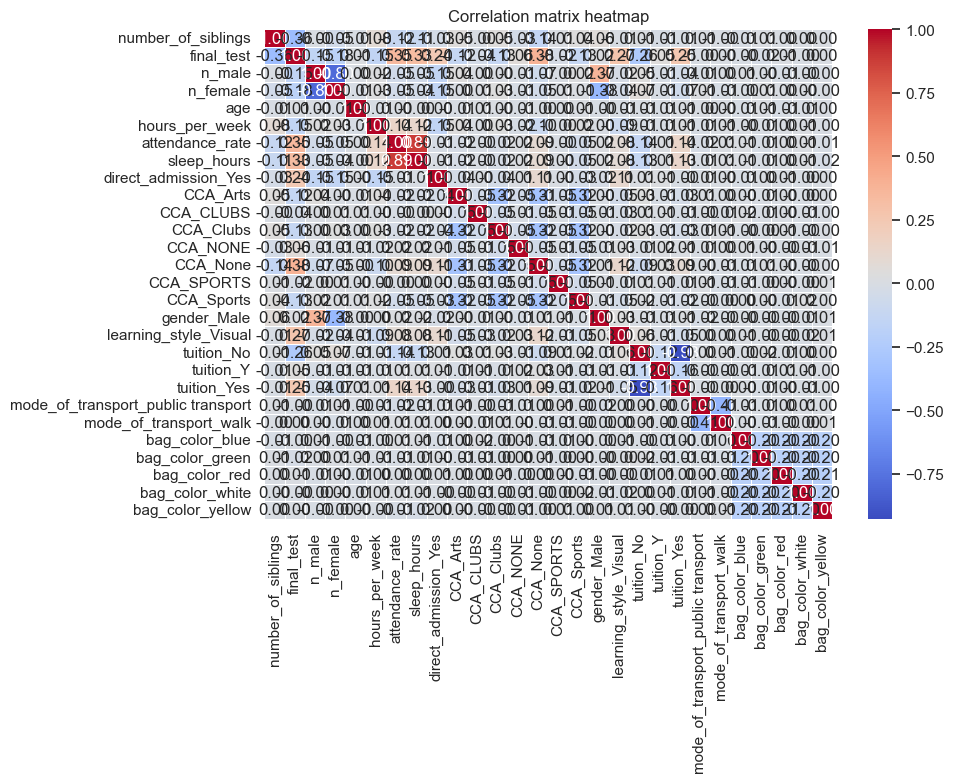

Correlation with 'final_test: 
final_test                            1.000000
CCA_None                              0.384028
number_of_siblings                    0.362389
attendance_rate                       0.346237
sleep_hours                           0.325097
learning_style_Visual                 0.269777
tuition_No                            0.256796
tuition_Yes                           0.252487
direct_admission_Yes                  0.238797
n_female                              0.175266
hours_per_week                        0.149444
n_male                                0.145473
CCA_Clubs                             0.127988
CCA_Sports                            0.127733
CCA_Arts                              0.123418
CCA_NONE                              0.063054
tuition_Y                             0.049652
CCA_CLUBS                             0.037094
CCA_SPORTS                            0.022118
bag_color_green                       0.017793
gender_Male                  

In [61]:
# Calculate correlation matrix
corr_matrix = encoded_score_data_df.corr()

# Create heatmap of correlation matrix
plt.figure(figsize = (10, 8)) # Adjust size as needed
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm", fmt = ".2f", linewidths = 0.5)

# Show plot
plt.title("Correlation matrix heatmap")
plt.tight_layout()
plt.show()

final_test_corr = corr_matrix["final_test"]

# Sort correlations by absolute value (if strong correlations should be prioritized)
sorted_corr = final_test_corr.abs().sort_values(ascending = False)

# Print numerical correlation values
print("Correlation with 'final_test: ")
print(sorted_corr)

Drop all features with correlation value < 0.1

In [62]:
drop_cols = sorted_corr[sorted_corr < 0.1].index

final_score_data_df = encoded_score_data_df.drop(columns = drop_cols, axis = 1)
final_score_data_df

,number_of_siblings,final_test,n_male,n_female,hours_per_week,attendance_rate,sleep_hours,direct_admission_Yes,CCA_Arts,CCA_Clubs,CCA_None,CCA_Sports,learning_style_Visual,tuition_No,tuition_Yes
0,-1.182036,0.131977,0.024139,-1.040434,-0.073904,-0.286910,0.254872,1,0,0,0,1,1,1,0
1,1.478195,-1.442990,-1.503089,1.503792,-0.745745,0.090516,0.254872,0,0,0,0,1,0,1,0
2,-1.182036,1.277409,0.024139,-1.040434,-0.521798,-0.161102,0.254872,1,0,0,1,0,1,1,0
4,-1.182036,-0.082791,1.551367,-0.890773,-0.745745,0.216325,0.254872,0,0,0,0,1,0,1,0
5,-1.182036,-0.727096,-0.739475,0.456170,0.150043,0.342134,0.254872,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15895,0.148079,-0.798685,-0.281307,0.755490,-0.297851,0.342134,0.254872,0,0,1,0,0,1,1,0
15896,0.148079,1.277409,0.482308,-0.591453,-0.745745,-0.286910,0.254872,1,0,0,1,0,0,0,1
15897,0.148079,0.633104,-1.044921,0.156849,-0.745745,-0.035293,0.254872,1,0,0,0,1,0,0,1
15898,0.148079,-1.586169,0.635030,0.456170,-1.641533,0.090516,0.254872,0,0,1,0,0,1,0,1


Testing ML for choosen features in final_score_data_df

In [63]:
X = final_score_data_df.drop(["final_test"], axis = 1)
Y = final_score_data_df["final_test"]

from sklearn.model_selection import train_test_split

# Split data into test and train (20/80 split)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

Start with linear regression

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)
lin_Y_predict = lin_model.predict(X_test)

lin_mse = mean_squared_error(Y_test, lin_Y_predict)
lin_r2 = r2_score(Y_test, lin_Y_predict)

print("Linear Regression -")
print(f"Mean Squared Error: {lin_mse}")
print(f"R^2: {lin_r2}")

Linear Regression -
Mean Squared Error: 0.4298515834926658
R^2: 0.582964686834214


Try next with Random Forest

In [65]:
from sklearn.ensemble import RandomForestRegressor

rand_for_model = RandomForestRegressor()
rand_for_model.fit(X_train, Y_train)
rand_for_Y_predict = rand_for_model.predict(X_test)

rand_for_mse = mean_squared_error(Y_test, rand_for_Y_predict)
rand_for_r2 = r2_score(Y_test, rand_for_Y_predict)

print("Pre-tuning Random Forest Regression -")
print(f"Mean Squared Error: {rand_for_mse}")
print(f"R^2: {rand_for_r2}")

Pre-tuning Random Forest Regression -
Mean Squared Error: 0.2872383145312716
R^2: 0.7213258597759585


Tune Random Forest for better results

In [66]:
def tune_n_eval_regressor(X, Y, search_method = "grid", param_grid = None, param_dist = None, random_iter = 50, cv = 5):
    """
    Automates the tuning and evaluation of a Random Forest Regressor model.

    Parameters:
        X: Features (DataFrame or array).
        y: Target variable (Series or array).
        search_method: 'grid' for GridSearchCV, 'random' for RandomizedSearchCV.
        param_grid: Dictionary of hyperparameter ranges for GridSearchCV.
        param_dist: Dictionary of hyperparameter distributions for RandomizedSearchCV.
        random_iter: Number of iterations for RandomizedSearchCV.
        cv: Number of cross-validation folds.

    Returns:
        best_model: The tuned Random Forest Regressor model.
        best_params: The best hyperparameters found.
    """
    from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

    # Initialize parameters
    if param_grid is None:
        param_grid = {
            "n_estimators": [100, 150, 200, 250, 300, 350],
            "max_depth": [None, 5, 10, 15, 20],
            "max_features": ["sqrt", "log2", None],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4]
        }
    if param_dist is None:
        from scipy.stats import randint
        param_dist = {
            "n_estimators": randint(100, 500),
            "max_depth": [None, 5, 10, 15, 20, 25, 30],
            "max_features": ["sqrt", "log2", None],
            "min_samples_split": randint(2, 20),
            "min_samples_leaf": randint(1, 20)
        }

    if search_method == "grid":
        search = GridSearchCV(
            RandomForestRegressor(random_state = 42),
            param_grid = param_grid,
            cv = cv,
            scoring = "neg_mean_squared_error",
            n_jobs = 4
        )
    elif search_method == "random":
        search = RandomizedSearchCV(
            RandomForestRegressor(random_state = 42),
            param_distributions = param_dist,
            n_iter = random_iter,
            cv = cv,
            scoring = "neg_mean_squared_error",
            random_state = 42,
            n_jobs = 4
        )
    else:
        raise ValueError("search_method must be either 'grid' or ' random'")
    
    # Fit the search
    print(f"Running {search_method.capitalize()} Search...")
    search.fit(X_train, Y_train)

    # Best model and parameters
    best_model = search.best_estimator_
    best_params = search.best_params_
    print(f"\nBest Parameters: {best_params}")

    # Test set evaluation
    tuned_rand_for_Y_predict = best_model.predict(X_test)
    tuned_rand_for_mse = mean_squared_error(Y_test, tuned_rand_for_Y_predict)
    tuned_rand_for_r2 = r2_score(Y_test, tuned_rand_for_Y_predict)
    print("Tuned Random Forest Regression -")
    print(f"Tuned Set Mean Squared Error: {tuned_rand_for_mse:.4f}")
    print(f"Tuned Set R^2: {tuned_rand_for_r2:.4f}")

    # Plot scatter plot of actual vs predicted
    plt.figure(figsize = (8,6))
    plt.scatter(Y_test, tuned_rand_for_Y_predict, alpha = 0.7)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs Predicted")
    plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color = "red", linestyle = "--")
    plt.show()

    return best_model, best_params


Call tuning and evaluation function

Running Grid Search...

Best Parameters: {'max_depth': 15, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 150}
Tuned Random Forest Regression -
Tuned Set Mean Squared Error: 0.2851
Tuned Set R^2: 0.7234


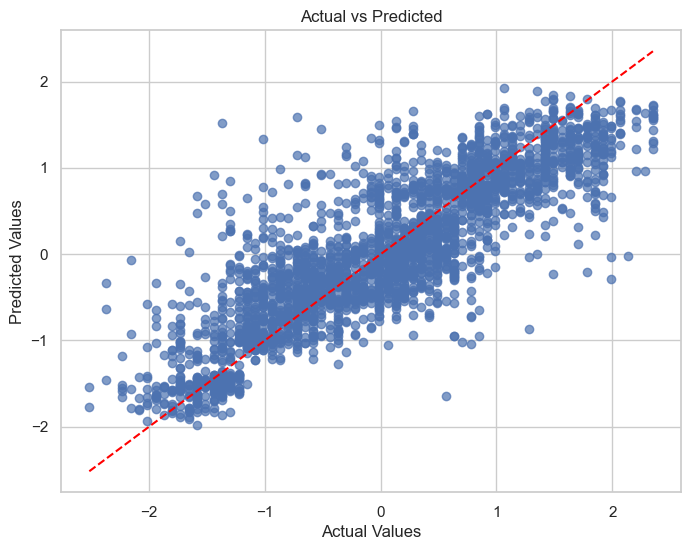

In [67]:
# Using Grid Search
grid_rand_for_best_model, grid_rand_for_best_param = tune_n_eval_regressor(
    X = final_score_data_df.drop(columns = ["final_test"]),
    Y = final_score_data_df["final_test"],
    search_method = "grid"
)

Running Random Search...

Best Parameters: {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 13, 'n_estimators': 393}
Tuned Random Forest Regression -
Tuned Set Mean Squared Error: 0.2847
Tuned Set R^2: 0.7238


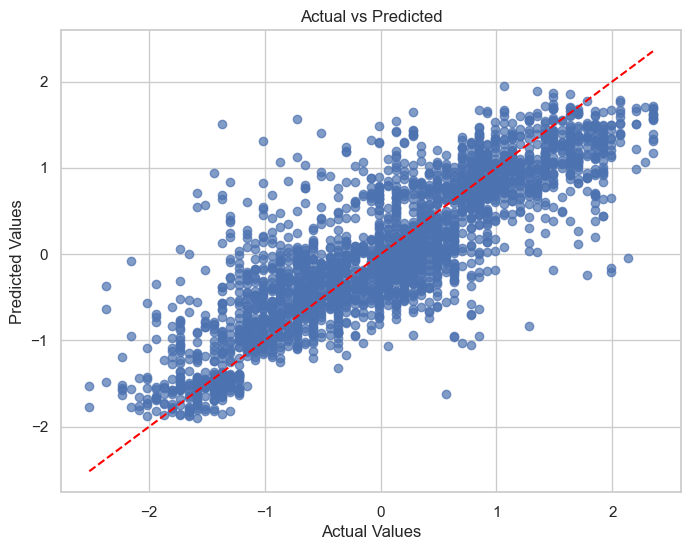

In [68]:
# Using Random Search
grid_rand_for_best_model, grid_rand_for_best_param = tune_n_eval_regressor(
    X = final_score_data_df.drop(columns = ["final_test"]),
    Y = final_score_data_df["final_test"],
    search_method = "random"
)

Use XGBoost for variation

In [73]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(random_state = 42)
xgb_model.fit(X_train, Y_train)
xgb_Y_predict = xgb_model.predict(X_test)

xgb_mse = mean_squared_error(Y_test, xgb_Y_predict)
xgb_r2 = r2_score(Y_test, xgb_Y_predict)

print("XGBoost -")
print(f"Mean Squared Error: {xgb_mse:.4f}")
print(f"R^2: {xgb_r2:.4f}")

XGBoost -
Mean Squared Error: 0.2279
R^2: 0.7789


Check the variance and range of target variable - final_test

In [70]:
# Calculate variance of target variable
variance_final_test = Y_test.var() # Variance of actual target values
print(f"Variance of 'final_test': {variance_final_test:.3f}")

# Calculate range of target variable
range_final_test = Y_test.max() - Y_test.min()
print(f"Range of 'final_test': {range_final_test:.3f}")

Variance of 'final_test': 1.031
Range of 'final_test': 4.868


Perform ML with PCA(95% variance) features

In [71]:
X = final_score_data_df.drop(columns = ["final_test"])
Y = final_score_data_df["final_test"]

from sklearn.decomposition import PCA
import numpy as np
pca = PCA(n_components = 0.95) # Keep 95% of variance
X_pca = pca.fit_transform(X)

print("Explained variance ratio: ", pca.explained_variance_ratio_)
print("Cumulative explained variance: ", np.cumsum(pca.explained_variance_ratio_))

X_train, X_test, Y_train, Y_test = train_test_split(X_pca, Y, test_size = 0.2, random_state = 42)
pca_model = RandomForestRegressor()
pca_model.fit(X_train, Y_train)

pca_Y_predict = pca_model.predict(X_test)

print("PCA Random Forest Regression -")
print("Mean Squared Error: ", mean_squared_error(Y_test, pca_Y_predict))
print("R2: ", r2_score(Y_test, pca_Y_predict))

Explained variance ratio:  [0.25645063 0.23406719 0.14240324 0.1139708  0.06177689 0.04083109
 0.03193298 0.03134558 0.02958808 0.02652914]
Cumulative explained variance:  [0.25645063 0.49051782 0.63292106 0.74689186 0.80866874 0.84949983
 0.88143281 0.91277839 0.94236648 0.96889561]
PCA Random Forest Regression -
Mean Squared Error:  0.21685008777981435
R2:  0.7896154213682778


Perform cross-validation with PCA feature

In [72]:
from sklearn.model_selection import cross_val_score
x_valid_model = RandomForestRegressor(random_state = 42)

# Perform 5-fold cross-validation
scores = cross_val_score(x_valid_model, X, Y, cv = 5, scoring = "neg_mean_squared_error")

print(f"Cross-Validation Mean Mean Squared Error: {-scores.mean():.4f}")
print(f"Cross-Validation Standard Deviation Mean Squared Error: {-scores.std():.4f}")

Cross-Validation Mean Mean Squared Error: 0.2784
Cross-Validation Standard Deviation Mean Squared Error: -0.0087
